In [1]:
import numpy as np


np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Helper

In [2]:
def print_grid_cv_results(grid_result: GridSearchCV) -> None:
    print(
        f"Best model score: {grid_result.best_score_} "
        f"Best model params: {grid_result.best_params_} "
    )
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    params = grid_result.cv_results_["params"]

    zipped = sorted(zip(means, stds, params), key=lambda x: x[0], reverse=True)

    for mean, std, param in zipped[:10]:
        mean = round(mean, 4)
        std = round(std, 4)
        print(f"{mean} (+/- {2 * std}) with: {param}")

#### LOAD DATASET

In [3]:
cal_housing = fetch_california_housing()

x: np.ndarray = cal_housing.data
y: np.ndarray = cal_housing.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### NORMALIZE DATASET

In [4]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train: np.ndarray = scaler.transform(x_train)
x_test: np.ndarray = scaler.transform(x_test)

#### Metrics

In [5]:
scoring_metrics = {"r2_score": make_scorer(r2_score)}

#### LINEAR REGRESSION:

In [6]:
from sklearn.linear_model import LinearRegression


regr = LinearRegression()
cv_results = cross_validate(
    regr, x_train, y_train, cv=3, scoring=scoring_metrics
)
test_r2_score = cv_results["test_r2_score"]

print(f"Mean R2: {np.mean(test_r2_score)}")

Mean R2: 0.6075224720706819


#### KNN REGRSSOR

In [7]:
from sklearn.neighbors import KNeighborsRegressor


params = {
    "n_neighbors": [i for i in range(2, 24, 2)],
    "weights": ["uniform", "distance"],
}

regr = KNeighborsRegressor()

grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

Best model score: 0.6836115816373965 Best model params: {'n_neighbors': 14, 'weights': 'distance'} 
0.6836 (+/- 0.0054) with: {'n_neighbors': 14, 'weights': 'distance'}
0.6836 (+/- 0.0056) with: {'n_neighbors': 12, 'weights': 'distance'}
0.6833 (+/- 0.0066) with: {'n_neighbors': 16, 'weights': 'distance'}
0.6824 (+/- 0.0054) with: {'n_neighbors': 10, 'weights': 'distance'}
0.6823 (+/- 0.0068) with: {'n_neighbors': 18, 'weights': 'distance'}
0.6809 (+/- 0.0068) with: {'n_neighbors': 20, 'weights': 'distance'}
0.6799 (+/- 0.0058) with: {'n_neighbors': 22, 'weights': 'distance'}
0.6791 (+/- 0.0052) with: {'n_neighbors': 8, 'weights': 'distance'}
0.6784 (+/- 0.0068) with: {'n_neighbors': 12, 'weights': 'uniform'}
0.6782 (+/- 0.0064) with: {'n_neighbors': 14, 'weights': 'uniform'}


#### RANDOM FOREST REGRESSOR

In [8]:
from sklearn.ensemble import RandomForestRegressor


params = {
    "n_estimators": [50 * i for i in range(4, 10)],
    "max_depth": [i for i in range(20, 51, 10)] + [None],
}

regr = RandomForestRegressor()

grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

Best model score: 0.7944312806783603 Best model params: {'max_depth': None, 'n_estimators': 450} 
0.7944 (+/- 0.0114) with: {'max_depth': None, 'n_estimators': 450}
0.7943 (+/- 0.0112) with: {'max_depth': 40, 'n_estimators': 250}
0.7941 (+/- 0.0114) with: {'max_depth': 30, 'n_estimators': 400}
0.7941 (+/- 0.0118) with: {'max_depth': 40, 'n_estimators': 450}
0.7941 (+/- 0.012) with: {'max_depth': 50, 'n_estimators': 350}
0.794 (+/- 0.013) with: {'max_depth': 20, 'n_estimators': 450}
0.794 (+/- 0.0132) with: {'max_depth': 30, 'n_estimators': 300}
0.7939 (+/- 0.0128) with: {'max_depth': 40, 'n_estimators': 400}
0.7939 (+/- 0.0126) with: {'max_depth': 30, 'n_estimators': 250}
0.7939 (+/- 0.0126) with: {'max_depth': 30, 'n_estimators': 450}


#### GRADIENT BOOSTING REGRESSOR

In [9]:
from sklearn.ensemble import GradientBoostingRegressor


params = {
    "n_estimators": [50 * i for i in range(4, 10)],
    "max_depth": [i for i in range(20, 51, 10)] + [None],
}

regr = GradientBoostingRegressor()

grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

Best model score: 0.6492602116771097 Best model params: {'max_depth': 20, 'n_estimators': 450} 
0.6493 (+/- 0.0224) with: {'max_depth': 20, 'n_estimators': 450}
0.649 (+/- 0.024) with: {'max_depth': 20, 'n_estimators': 250}
0.6489 (+/- 0.0234) with: {'max_depth': 20, 'n_estimators': 300}
0.6486 (+/- 0.0232) with: {'max_depth': 20, 'n_estimators': 200}
0.6478 (+/- 0.022) with: {'max_depth': 20, 'n_estimators': 350}
0.6476 (+/- 0.0252) with: {'max_depth': 20, 'n_estimators': 400}
0.6103 (+/- 0.0376) with: {'max_depth': 50, 'n_estimators': 200}
0.6101 (+/- 0.0384) with: {'max_depth': 50, 'n_estimators': 450}
0.6097 (+/- 0.0356) with: {'max_depth': 50, 'n_estimators': 300}
0.6095 (+/- 0.0392) with: {'max_depth': None, 'n_estimators': 200}


#### SVM REGRESSOR:

In [10]:
from sklearn.svm import SVR


params = {"kernel": ["linear", "sigmoid", "rbf", "poly"]}

regr = SVR()

grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

Best model score: 0.7275190171474755 Best model params: {'kernel': 'rbf'} 
0.7275 (+/- 0.0108) with: {'kernel': 'rbf'}
-1.5373 (+/- 6.0058) with: {'kernel': 'linear'}
-2946.1869 (+/- 8262.3178) with: {'kernel': 'poly'}
-4291.9646 (+/- 1706.097) with: {'kernel': 'sigmoid'}


#### BEST MODEL:

In [14]:
best_params = {"max_depth": None, "n_estimators": 450}
best_regressor = RandomForestRegressor

regr = best_regressor(**best_params)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 0.2535266377919824
MAE: 0.3300328360465117
R2: 0.8068427499604178


#### Residual Plot of Best Model

In [15]:
def plot_residuals(
    regr: RandomForestRegressor,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
) -> None:
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue", s=5)
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red", s=5)
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

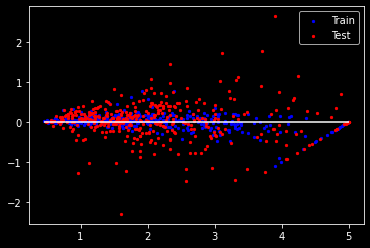

In [18]:
plot_residuals(regr, x_train[:400], y_train[:400], x_test[:400], y_test[:400])